# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weather_api_key + "&units=" + "metric" + "&q=" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url)
        city_weather = city_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})              

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | gazojak
Processing Record 4 of Set 1 | tofol
Processing Record 5 of Set 1 | nova olinda do norte
Processing Record 6 of Set 1 | augusto correa
Processing Record 7 of Set 1 | sidi bouzid
Processing Record 8 of Set 1 | jinchang
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | fale old settlement
Processing Record 12 of Set 1 | kamaishi
Processing Record 13 of Set 1 | obonoma
Processing Record 14 of Set 1 | santa elena de uairen
Processing Record 15 of Set 1 | motomachi
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | ta`u
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | vila franca do campo
Processing Record 21 of Set 1 | b

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-4.06,79,48,4.71,GS,1693950089
1,adamstown,-25.0660,-130.1015,19.90,85,100,7.39,PN,1693950089
2,gazojak,41.1875,61.4036,21.16,33,4,4.65,TM,1693950089
3,tofol,5.3248,163.0078,28.60,75,58,5.18,FM,1693950090
4,nova olinda do norte,-3.8881,-59.0942,32.94,29,11,0.40,BR,1693950090


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-4.06,79,48,4.71,GS,1693950089
1,adamstown,-25.0660,-130.1015,19.90,85,100,7.39,PN,1693950089
2,gazojak,41.1875,61.4036,21.16,33,4,4.65,TM,1693950089
3,tofol,5.3248,163.0078,28.60,75,58,5.18,FM,1693950090
4,nova olinda do norte,-3.8881,-59.0942,32.94,29,11,0.40,BR,1693950090


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

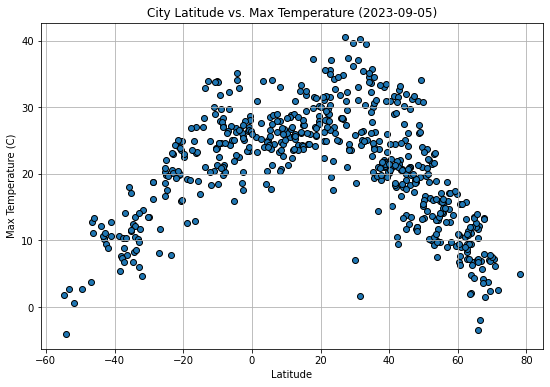

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
plt.figure(figsize=(9,6))
plt.grid()
plt.scatter(latitude, temperature, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2023-09-05)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

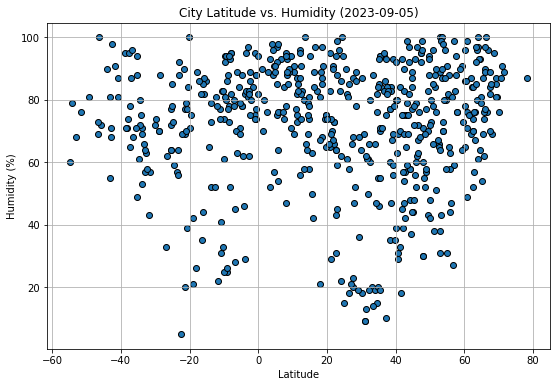

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
plt.figure(figsize=(9,6))
plt.grid()
plt.scatter(latitude, humidity, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2023-09-05)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

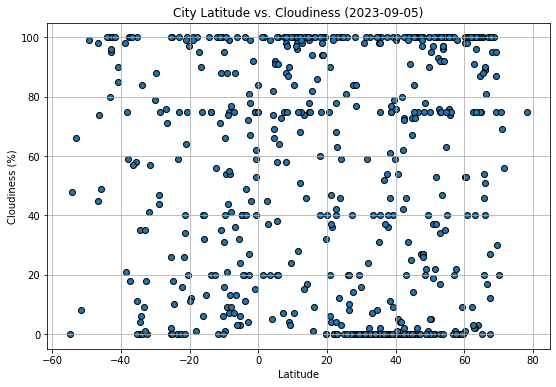

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.figure(figsize=(9,6))
plt.grid()
plt.scatter(latitude, cloudiness, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2023-09-05)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

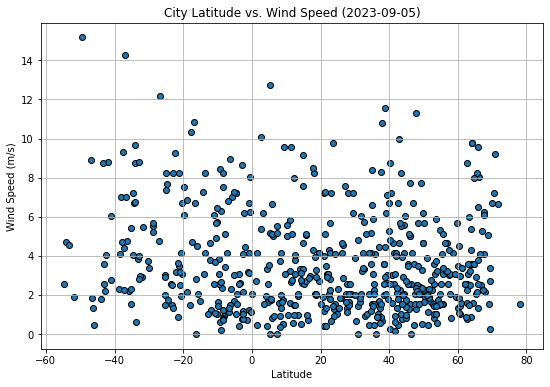

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
windspeed = city_data_df["Wind Speed"]
plt.figure(figsize=(9,6))
plt.grid()
plt.scatter(latitude, windspeed, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2023-09-05)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linearregression():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    correlation = st.pearsonr(x_axis, y_axis)
    print(f"The r-value is: {round(correlation[0],2)}")
    plt.figure(figsize=(9,6))
    plt.scatter(x_axis, y_axis)
    plt.xlabel('Latitude')
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq, (x_value, y_value), fontsize=14,color="red")
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,gazojak,41.1875,61.4036,21.16,33,4,4.65,TM,1693950089
3,tofol,5.3248,163.0078,28.60,75,58,5.18,FM,1693950090
6,sidi bouzid,35.0382,9.4849,22.62,55,0,6.60,TN,1693950090
7,jinchang,38.4953,102.1739,21.10,60,11,1.99,CN,1693950090
11,kamaishi,39.2667,141.8833,23.36,93,100,2.61,JP,1693950091


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-4.06,79,48,4.71,GS,1693950089
1,adamstown,-25.0660,-130.1015,19.90,85,100,7.39,PN,1693950089
4,nova olinda do norte,-3.8881,-59.0942,32.94,29,11,0.40,BR,1693950090
5,augusto correa,-1.0217,-46.6350,26.37,75,15,3.17,BR,1693950090
8,port-aux-francais,-49.3500,70.2167,2.63,81,99,15.17,TF,1693950090


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.71


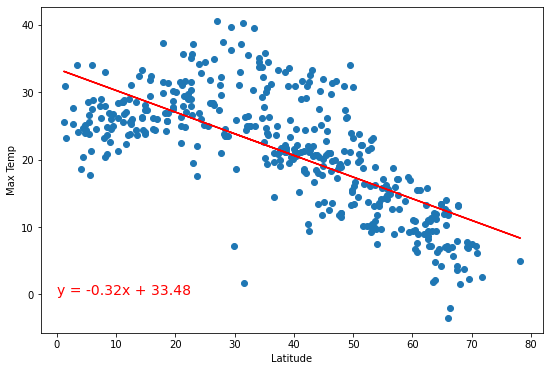

In [15]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
x_value = 0
y_value = 0
linearregression()
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.84


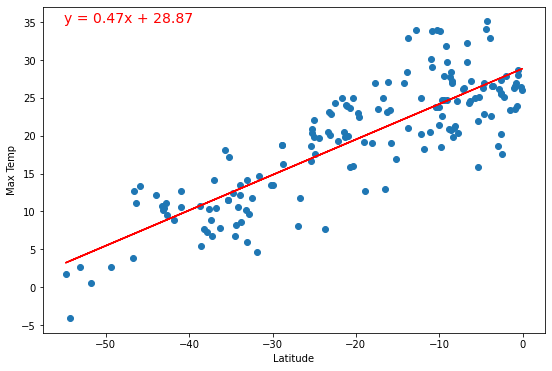

In [16]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
x_value = -55
y_value = 35
linearregression()
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** Both scatter plots show a strong correlation between Latitude and Max Temp. That being said, the correlation in the Southern Hemisphere is stronger.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.01


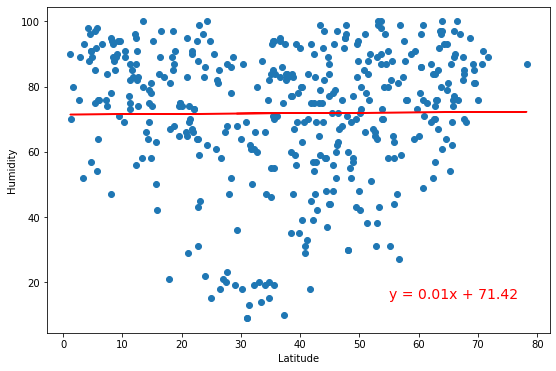

In [17]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
x_value = 55
y_value = 15
linearregression()
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.01


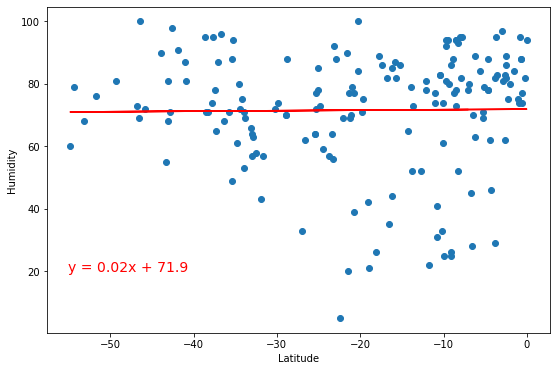

In [18]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
x_value = -55
y_value = 20
linearregression()
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.03


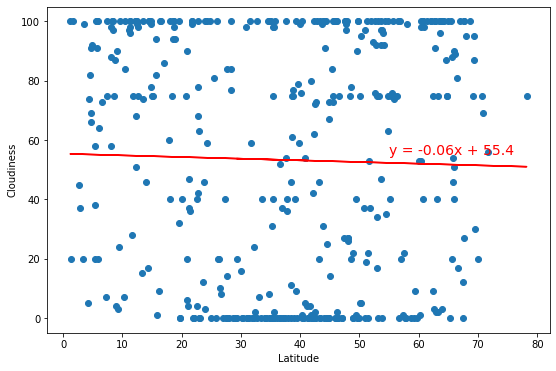

In [19]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
x_value = 55
y_value = 55
linearregression()
plt.ylabel('Cloudiness')
plt.show()

The r-value is: -0.09


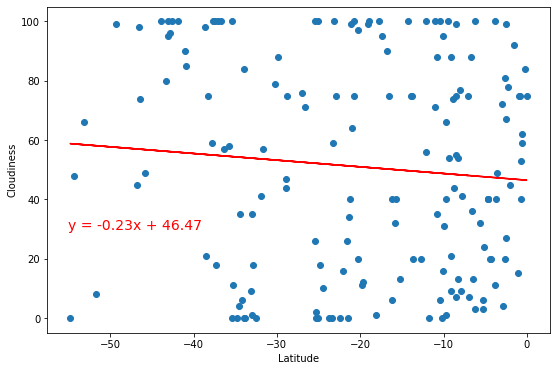

In [20]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
x_value = -55
y_value = 30
linearregression()
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02


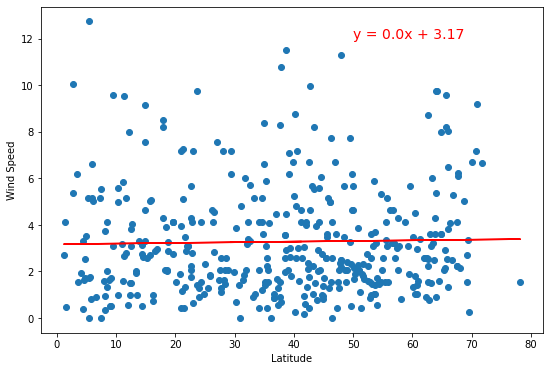

In [21]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
x_value = 50
y_value = 12
linearregression()
plt.ylabel('Wind Speed')
plt.show()

The r-value is: -0.2


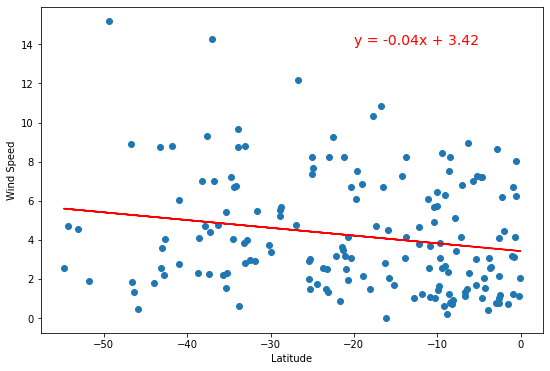

In [22]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
x_value = -20
y_value = 14
linearregression()
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE